In [1]:
import numpy as np
from skimage.io import imread, imsave
# import torch

In [2]:
data_all=imread("/scratch/midway3/dzgong/SIM201-210.tif", plugin='tifffile')
print(data_all.shape)

(30, 4096, 4096)


In [ ]:

# data_MT=imread("/mnt/efs/shared_data/virtual_staining/SIM_all/SIM_stack_tiff/MT201-240.tif", plugin='tifffile')
# print(data_MT.shape)

# data_tubulin=imread("/mnt/efs/shared_data/virtual_staining/SIM_all/SIM_stack_tiff/tubulin201-240.tif", plugin='tifffile')
# print(data_tubulin.shape)
# data_nuc=imread("/mnt/efs/shared_data/virtual_staining/SIM_all/SIM_stack_tiff/nuc201-240", plugin='tifffile')
# print(data_nuc.shape)

In [4]:
data_actin = data_all[:10].astype(np.uint16)
print(data_actin.shape,data_actin.dtype)
data_MT = data_all[10:20].astype(np.uint16)
print(data_MT.shape,data_MT.dtype)
data_tubulin = data_all[20:].astype(np.uint16)
print(data_tubulin.shape,data_tubulin.dtype)

(10, 4096, 4096) uint16
(10, 4096, 4096) uint16
(10, 4096, 4096) uint16


In [5]:
data_composite=np.stack([data_actin,data_MT,data_tubulin])
print(data_composite.shape)

# data_actin=None
# data_MT=None
# data_tubulin=None


(3, 10, 4096, 4096)


In [6]:

data_composite_transpose=np.transpose(data_composite, (1, 2, 3, 0))
print(data_composite_transpose.shape)
data_composite =None


(10, 4096, 4096, 3)


In [ ]:
# !ls -lhrt /home/daozhengg/data/SIM_all/SIM_nxyc_tiff/SIM201-240-3channel.tif

In [9]:
imsave("/scratch/midway3/dzgong/SIM201-210-3channel.tif", data_composite_transpose, plugin='tifffile')

/home/dzgong/ipykernel_1890329/1569591905.py:1: UserWarning: /scratch/midway3/dzgong/SIM201-210-3channel.tif is a low contrast image
  imsave("/scratch/midway3/dzgong/SIM201-210-3channel.tif", data_composite_transpose, plugin='tifffile')


In [10]:
data_new=imread("/scratch/midway3/dzgong/SIM201-210-3channel.tif", plugin='tifffile')
print(data_new.shape)

(10, 4096, 4096, 3)


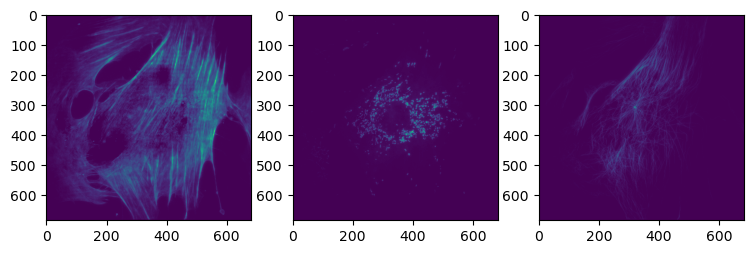

In [13]:
import matplotlib.pyplot as plt
_,ax = plt.subplots(figsize=(9,3),ncols=3)
id=6
ax[0].imshow(data_new[id,::6,::6,0])
ax[1].imshow(data_new[id,::6,::6,1])
ax[2].imshow(data_new[id,::6,::6,2])